# Unit 3.3 Assignment Unsupervised Machine Learning 

## Peer Members: 

• Syed Muhammad Raqim Ali Shah (2303.KHI.DEG.008) 

• Maaz Javaid Siddique (2303.KHI.DEG.004) 

## Solution

In [1]:
#First imported the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [2]:
iris=datasets.load_iris() #load dataset

In [3]:
# Extract the features and target variable from the dataset
x=iris.data
y=iris.target

# K-Mean

In [4]:
# Initialize KMeans model with 3 clusters, 1 initialization, and 100 max iterations
model = KMeans(n_clusters=3, n_init=1, max_iter=100)

# Fit the model to the original data
model.fit(x)

# Predict the cluster labels for the original data
prediction_before_pca = model.predict(x)

# Get the coordinates of the centroids for each cluster
centroids = model.cluster_centers_
centroids


array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

<function matplotlib.pyplot.show(close=None, block=None)>

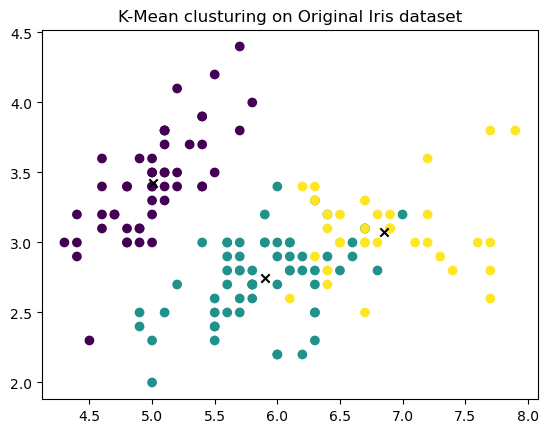

In [5]:
# Plot the scatter plot of the original data with predicted clusters
plt.scatter(x[:,0],x[:,1],c=prediction_before_pca)
# Plot the centroids of each cluster
plt.scatter(centroids[:,0],centroids[:,1],marker="x",color="black")
plt.title("K-Mean clusturing on Original Iris dataset")
plt.show

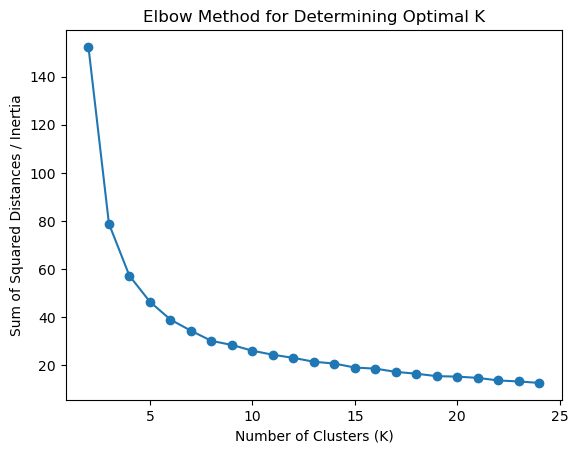

In [6]:
# Initialize empty lists to store inertia scores and corresponding K values
k_values = []
inertia_scores = []

# Iterate over a range of K values and calculate inertia scores for each value
for k in range(2, 25):
    # Initialize KMeans model with current K value
    model = KMeans(n_clusters=k)
    # Fit the model to the data
    model.fit(x)
    # Append the inertia score and corresponding K value to the respective lists
    inertia_scores.append(model.inertia_)
    k_values.append(k)

# Plot the inertia scores for each K value and mark the data points
plt.plot(k_values, inertia_scores)
plt.scatter(k_values, inertia_scores)
# Set the x and y labels of the plot
plt.xlabel("Number of Clusters (K)") 
plt.ylabel("Sum of Squared Distances / Inertia") 
# Set the title of the plot
plt.title("Elbow Method for Determining Optimal K")
# Show the plot
plt.show()

# K Mean with Reduce data by PCA

## PCA

In [7]:
iris=datasets.load_iris() #load dataset

In [8]:
x.shape

(150, 4)

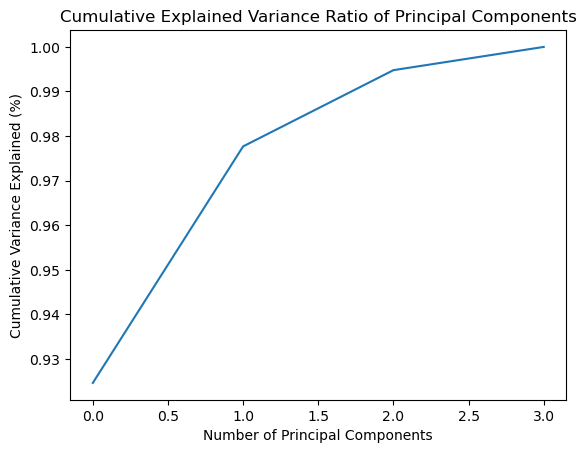

Cumulative Explained Variance by Number of Components:
 [0.92461872 0.97768521 0.99478782 1.        ]


In [9]:
pca=PCA(n_components=2)
# Fit and transform the data to 2 principal components
x_reduce=pca.fit_transform(x)
pca = PCA().fit(x)
# Calculate the cumulative explained variance ratio of the principal components
cumulative_var_explained = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance ratio for each principal component
plt.plot(cumulative_var_explained)
plt.xlabel("Number of Principal Components") 
plt.ylabel("Cumulative Variance Explained (%)") 
plt.title("Cumulative Explained Variance Ratio of Principal Components")
plt.show()

print("Cumulative Explained Variance by Number of Components:\n", cumulative_var_explained)

## Now perform K Mean clusturing with reduce dataset

In [10]:
# Initialize KMeans with 3 clusters, 1 initialization and 100 maximum iterations
model = KMeans(n_clusters=3, n_init=1, max_iter=100)

# Fit KMeans to the reduced data
model.fit(x_reduce)

# Predict the clusters of the reduced data
prediction_after_pca = model.predict(x_reduce)

# Get the coordinates of the cluster centers
centroids = model.cluster_centers_

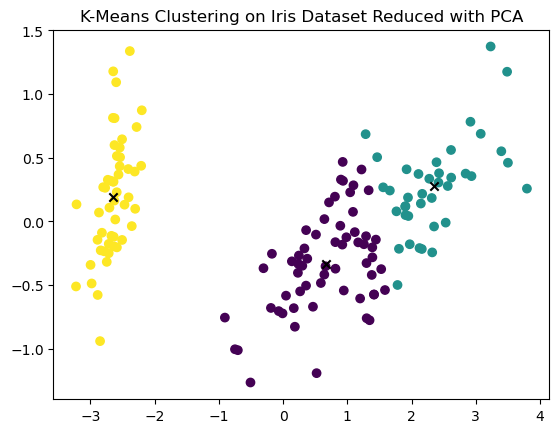

In [11]:
plt.scatter(x_reduce[:,0],x_reduce[:,1],c=prediction_after_pca)
plt.scatter(centroids[:,0],centroids[:,1],marker="x",color="black")
plt.title('K-Means Clustering on Iris Dataset Reduced with PCA')
plt.show()

In [12]:
adjusted_rand_value=adjusted_rand_score(prediction_after_pca,prediction_before_pca)
print(f"The Adjusted Rand Index comparing clustering before and after PCA is : {adjusted_rand_value:.3f}")

The Adjusted Rand Index comparing clustering before and after PCA is : 0.980


**"adjusted_rand_score" is a function that is used to compute the Adjusted Rand Index (ARI) between two clusterings. The ARI is a measure of the similarity between two clusterings, the ARI is a good measure to use when evaluating the similarity between two clusterings of a dataset.**